In [107]:
import pandas as pd
import numpy as np
import scipy


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [108]:
data= pd.read_csv ('music_dataset_mod.csv')
data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [109]:
data.describe ()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [111]:
unique_genres = data['Genre'].unique()

# Display the unique genres
unique_genres

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

### Genre Distribution 

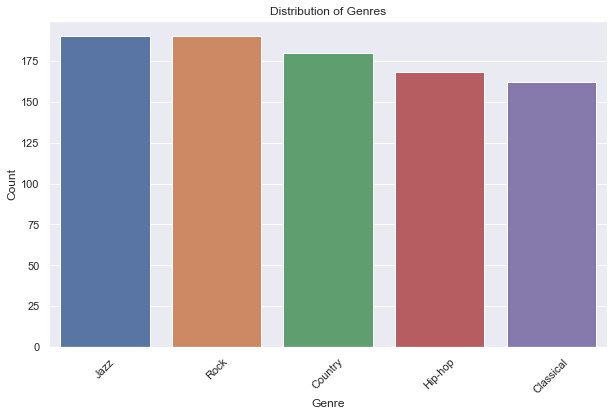

In [112]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  #Optional: Rotate x-axis labels for better readability
plt.show()

### Drop rows with null values in the Genre column

In [162]:
df_nonull = data.dropna(subset=['Genre']).copy()
df_nonull


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [163]:
# Separate features (X) and target variable (y)
X = df_nonull.drop(columns=['Genre'])
y = df_nonull['Genre']

In [164]:
X

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986
...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517


In [165]:
# Encode the target column (Genre)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [166]:
# Add the encoded Genre column back to the DataFrame
df_nonull['Genre_encoded'] = y_encoded

# Renaming dataframe
df_encoded_genre = df_nonull
df_encoded_genre


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock,4


## Correlation Analysis

In [167]:
# Create a correlation matrix
corr_matrix = df_encoded_genre.corr()
corr_matrix


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


### Visualize the Correlation Matrix as a Heatmap

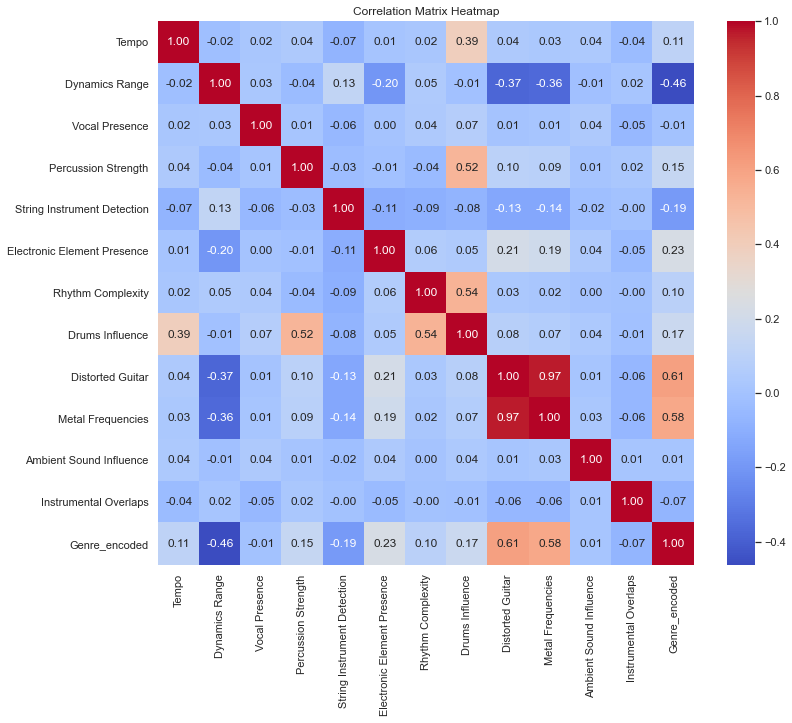

In [168]:
# Plot the heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## PCA for Dimensionality Reduction

In [169]:
# Separate the features (assuming 'Genre_encoded' is your target and should not be included)

#X= df_encoded.drop(columns=['Genre_encoded'])

In [170]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Apply PCA (Without Specifying Number of Components)

In [171]:
# Create an instance of the PCA class
pca = PCA()

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

#### Analyze the Explained Variance

In [172]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Display the explained variance for each component
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

Explained Variance Ratio for each component:
[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


#### Visualize the Cumulative Variance

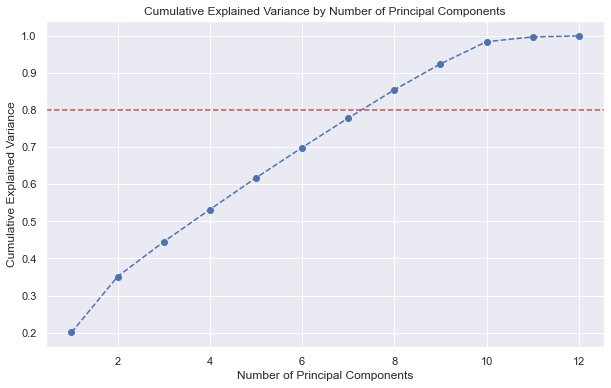

In [173]:
# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.axhline(y=0.80, color='r', linestyle='--')  # Add a horizontal line at 80% variance
plt.show()

Decide on the Number of Components to Retain: 8 is the minimum number of components required to capture at least 80% of the variance.

In [174]:

# Reapply PCA with 8 components
pca = PCA(n_components=8)
X_reduced = pca.fit_transform(X_scaled)

# Display the transformed data shape
print("Shape of the data after PCA:", X_reduced.shape)

# Display explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = sum(explained_variance)
print(f"Explained Variance Ratio for each of the 8 components:\n{explained_variance}")
print(f"Cumulative Variance explained by 8 components: {cumulative_variance:.2f}")


Shape of the data after PCA: (890, 8)
Explained Variance Ratio for each of the 8 components:
[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474]
Cumulative Variance explained by 8 components: 0.85


Explanation:
PCA(n_components=8) specifies that we want to retain 8 components.
X_reduced is the transformed data with reduced dimensions.
The script displays the shape of the reduced data and the explained variance by each of the 8 components. It also prints the cumulative variance explained by these components, verifying that it reaches or exceeds 80%.

## Evaluating Classification Efficacy – PCA-Transformed vs. Original Data


#### Split Data for PCA-Transformed Features

In [175]:
# Assuming X_reduced is the PCA-transformed data and y_encoded is the target variable
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)


## Train Logistic Regression on PCA transformed data

In [176]:
# Create and fit the Logistic Regression model on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=10000, random_state=42)
logreg_pca.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model's performance
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy on PCA-transformed data: {accuracy_pca:.2f}")

# Generate a classification report
print("Classification Report (PCA-transformed data):")
print(classification_report(y_test_pca, y_pred_pca))


Accuracy on PCA-transformed data: 0.54
Classification Report (PCA-transformed data):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



#### Repeat for original data 

In [177]:
# Split the original scaled data
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Create and fit the Logistic Regression model on original data
logreg_original = LogisticRegression(max_iter=10000, random_state=42)
logreg_original.fit(X_train_original, y_train_original)

# Predict on the test set
y_pred_original = logreg_original.predict(X_test_original)

# Evaluate the model's performance
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print(f"Accuracy on original data: {accuracy_original:.2f}")

# Generate a classification report
print("Classification Report (Original data):")
print(classification_report(y_test_original, y_pred_original))


Accuracy on original data: 0.53
Classification Report (Original data):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



## Genre Prediction and Integration

In [178]:
# Identify rows where the Genre is missing
missing_genre_rows = data[data['Genre'].isnull()].copy()
missing_genre_rows




,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281282,NaN


In [179]:

# Extract features from these rows (excluding the Genre column)
X_missing = missing_genre_rows.drop(columns=['Genre'])


#### Prepare Data for Prediction

Option 1: The chosen model will use PCA-transformed data because of the model performance.

First, scale the data and then apply PCA transformation.

In [180]:
# Standardize the features
X_missing_scaled = scaler.transform(X_missing)  # Using the same scaler instance used for the training data

# Apply PCA transformation
X_missing_pca = pca.transform(X_missing_scaled)  # Using the trained PCA 


In [184]:
# Predict the genres

y_missing_pred = logreg_pca.predict(X_missing_pca) 
y_missing_pred

array([0, 1, 1, 4, 4, 3, 3, 3, 4, 3, 3, 2, 4, 3, 4, 1, 4, 3, 2, 4, 2, 4,
       0, 3, 1, 3, 0, 2, 0, 3, 0, 1, 3, 4, 4, 4, 1, 0, 2, 1, 3, 0, 0, 1,
       4, 1, 2, 3, 0, 3, 1, 3, 0, 1, 4, 1, 2, 4, 1, 3, 2, 0, 0, 0, 1, 4,
       3, 0, 1, 1, 3, 1, 3, 4, 0, 4, 3, 3, 1, 1, 3, 0, 4, 0, 0, 4, 0, 1,
       2, 4, 0, 4, 4, 0, 4, 4, 0, 1, 0, 3, 2, 3, 2, 4, 3, 2, 4, 2, 2, 0])

In [185]:
# Assign the predicted genres back to the DataFrame
missing_genre_rows.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_missing_pred)

In [195]:
# Display the DataFrame with predicted genres
print(missing_genre_rows[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


#### Transform Prediction to Original Label

In [193]:
# Assign the predicted genres to the original DataFrame's missing values
data.loc[data['Genre'].isna(), 'Genre'] = missing_genre_rows['Predicted_Genre'].values

data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        1000 non-null   object 
dtypes: float64(12), obj